week 1 | Groundwater

# Topic 1 : Introduction to the Groundwater course - Modflow fundamentals 

Dr. Xiang-Zhao Kong & Dr. Beatrice Marti & Louise Noël du Payrat 

In [1]:
# Setting up the notebook
import sys
import os

# Add the parent directory and SUPPORT_REPO/src to the system path
sys.path.append('../SUPPORT_REPO/src')
sys.path.append('../SUPPORT_REPO/src/scripts/scripts_exercises')

# Import local modules
import print_images as du


# From Perceptual to Conceptual: Building the Model in MODFLOW
In the previous step, we built a **perceptual model** : a descriptive, high-level understanding of our aquifer system. Now, we translate that understanding into a **conceptual model**. This is where we make concrete decisions about how to represent the real world in a simplified, numerical form that a computer can solve. This involves choosing our modeling software, defining the geometry, and deciding how to represent physical processes.

> 🤔 **Why MODFLOW 2005?**
>
> For our case study, we need a tool that is robust, well-understood, and flexible. MODFLOW 2005 is an excellent choice for several reasons:
> *   **Open-Source & Free:** It's freely available, encouraging transparency and accessibility.
> *   **Industry Standard:** It is a well-documented and widely trusted code in the hydrogeology community, and its results are generally accepted by regulatory agencies.
> *   **Extensible:** It is compatible with other models, most importantly the **MT3DMS** model for solute transport, which we will use later in the course.
> *   **Broad Compatibility:** Many commercial modeling software packages use MODFLOW as their computational engine or can import/export MODFLOW files. Learning it gives you a transferable skill.

## 1 - Discretizing the World: The MODFLOW Grid
The real world is continuous, but a numerical model needs to break it down into manageable pieces. MODFLOW does this using a **finite-difference grid**. Imagine slicing the aquifer system into a series of blocks, like a giant 3D spreadsheet.

*   **Layers:** Represent vertical divisions, corresponding to different geological formations or simply vertical slices of a single unit.
*   **Rows & Columns:** Represent the horizontal divisions of the grid.

Each block is called a **cell**, and the model calculates a single value for the hydraulic head for each cell. The properties we assign to these cells (like hydraulic conductivity) and the interactions we define between them are what bring our conceptual model to life. See  Figure 1 (Source: Harbaugh, A. W. (2005): MODFLOW-2005 : the U.S. Geological Survey modular ground-water model--the ground-water flow process. USGS Numbered Series Techniques and Methods 6-A16. DOI: [10.3133/tm6A16](https://doi.org/10.3133/tm6A16)).


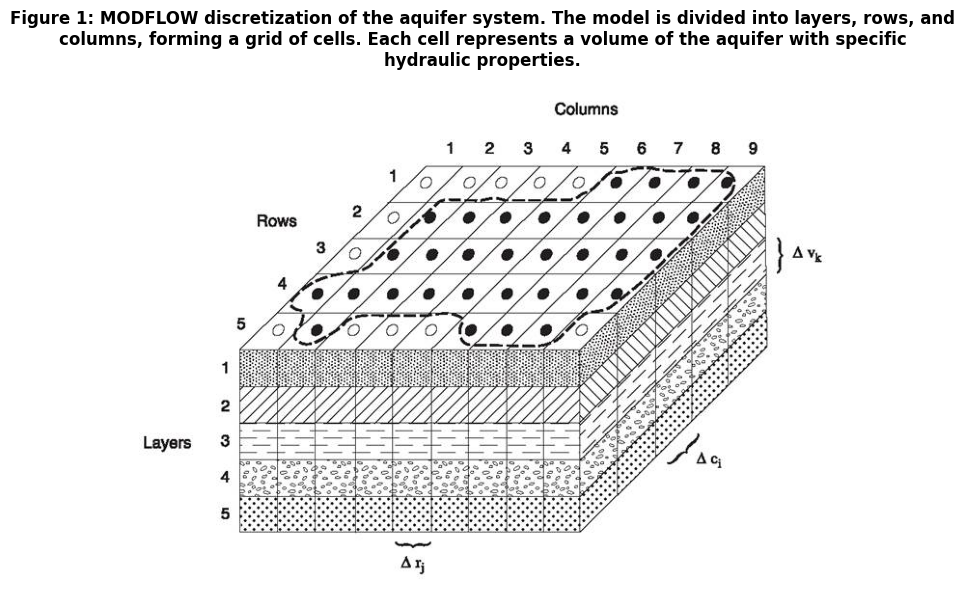

In [2]:
du.display_image(
    image_filename='modflow_discretization.jpg', 
    image_folder='2_conceptual_model', 
    caption='Figure 1: MODFLOW discretization of the aquifer system. The model is divided into layers, rows, and columns, forming a grid of cells. Each cell represents a volume of the aquifer with specific hydraulic properties.'
)

This is how we translate our perceptual model into a numerical model representation:

| Perceptual Model Element    | Numerical Model Representation        |
| --------------------------- | ------------------------------------- |
| Aquifer Extent              | Grid extent, boundary conditions      |
| Layered Sediment Sequence   | Number of model layers and properties |
| River Exchange              | River boundary package                |
| Recharge from Precipitation | Recharge array                        |
| Abstraction Wells           | Well package                          |

## 2 - Simulating Solute Transport with MT3DMS
While MODFLOW is excellent at calculating *where* and *how much* water is flowing, it doesn't tell us what's *in* the water. To simulate the movement of dissolved substances (solutes) like contaminants or tracers, we need a separate model. For our case study, we will use **MT3DMS**.

> 🧪 **Why MT3DMS?**
>
> MT3DMS (Modular 3-D Multi-Species Transport Model) is a standard for solute transport modeling for the same reasons we chose MODFLOW 2005: it is well-documented, widely trusted, and couples directly with the flow fields calculated by MODFLOW. It simulates key transport processes like:
> *   **Advection:** Transport with the bulk flow of groundwater.
> *   **Dispersion:** Spreading of the solute due to mechanical mixing and molecular diffusion.
> *   **Sorption:** Chemical attachment of solutes to aquifer materials.
> *   **Reaction:** Chemical or biological decay of the solute.

**An important limitation: fluid density**.
A key assumption in MT3DMS is that the solute concentration is low enough that it doesn't affect the fluid density. This means it is not suitable for problems where density differences drive flow, such as saltwater intrusion or geothermal systems. For those cases, a code like **SEAWAT** is required, which couples MODFLOW and MT3DMS to simulate variable-density groundwater flow and transport.



## 3 - A Glimpse into the Future: MODFLOW 6
While this course uses MODFLOW 2005 to teach foundational concepts, it's important to know that the field is moving towards **MODFLOW 6**. It represents a major restructuring and modernization of the MODFLOW code.

> ✨ **What's New in MODFLOW 6?**
>
> MODFLOW 6 is not just an update; it's a rewrite designed for more flexibility and power. Key differences include:
> *   **Integrated Flow and Transport:** MODFLOW 6 includes its own Groundwater Transport (GWT) model. This eliminates the need to couple a separate code like MT3DMS, simplifying the workflow for creating flow and transport simulations.
> *   **Flexible Grids:** It natively supports **unstructured grids** (e.g., grids with triangular or hexagonal cells) alongside traditional structured grids. This allows for a much more accurate representation of complex geological features, rivers, and boundaries without requiring an excessively fine grid everywhere.
> *   **Modern, Modular Framework:** The code is structured around a "simulation" concept that can contain multiple models (e.g., a flow model and a transport model) that can be coupled together.

MODFLOW 6 is the new standard from the USGS. As it becomes more established, its concepts and applications will be integrated into future versions of this course.


## 4 - The Building Blocks of MODFLOW: Packages
MODFLOW is modular. Instead of being a single, monolithic program, it's a collection of **packages**. Each package is designed to simulate a specific feature or process of the groundwater system. You mix and match packages to build a model that represents your specific conceptualization.

Here are some of the most fundamental packages we will use:

*   **BAS (Basic Package):** The foundation of every model. It defines the grid dimensions, cell status (active, inactive, or fixed-head), and initial head values for the simulation.
*   **LPF (Layer-Property Flow Package):** This is where you define the hydraulic properties of the aquifer, such as horizontal and vertical hydraulic conductivity (`HK`, `VK`) and storage properties (`Ss`, `Sy`).
*   **RCH (Recharge Package):** Used to simulate areally distributed recharge, typically from precipitation infiltrating across the top of the model.
*   **WEL (Well Package):** Simulates the effects of pumping (abstraction) or injection wells by adding or removing water from specific cells at a defined rate.
*   **RIV (River Package):** Simulates the interaction between the aquifer and a surface water body, like a river or lake. It calculates the flow between the river and the aquifer based on their head difference and the properties of the riverbed.
*   **OC (Output Control Package):** This package tells MODFLOW what, when, and how to save and print the simulation results, such as calculated heads or the overall water budget.

By selecting and configuring these packages, you are explicitly defining your conceptual model in a way that MODFLOW can understand and solve.

> **✍️ Illustration Suggestion:** A conceptual diagram with a central box labeled "MODFLOW Grid". Arrows point to this central box from smaller boxes labeled with package names like "Recharge (RCH)", "Rivers (RIV)", and "Wells (WEL)", illustrating the modular "plug-in" nature of the packages.

# A World Beyond MODFLOW: Other Tools and Models

While this course focuses on MODFLOW, a powerful and widely-used distributed modeling code, it's crucial to remember that it is just one tool in a hydrogeologist's toolkit. The choice of model always depends on the problem you are trying to solve, the available data, and your specific objectives.

As we discussed in the course introduction, models can range from simple analytical solutions to complex numerical codes. For a broader overview of different model types and their use cases, you can refer back to the summary table in **Notebook 1: Introduction**.

Beyond flow and transport simulators, the modern groundwater modeling workflow often involves a variety of specialized software for tasks like:
*   **Geostatistical Analysis:** Tools for spatial interpolation of parameters like hydraulic conductivity (e.g., using Kriging).
*   **Time Series Analysis:** Software like `Pastas` for analyzing groundwater level time series to understand system responses without a full numerical model.
*   **Geological Modeling:** Software for building and visualizing the subsurface geological framework from borehole data and cross-sections.

Choosing the right combination of tools is a key skill for an effective groundwater modeler. So it is important for a modeler to be familiar with the strengths and limitations of different approaches, and to select the most appropriate tool for each specific task.

> 💡 **Before you go any further**
>
> Save the links to the documentation of Modflow2005 and FloPy in your bookmarks. You will need them throughout the course.  
> * Modflow2005: PDF-Guide [https://pubs.usgs.gov/tm/2005/tm6A16/](https://pubs.usgs.gov/tm/2005/tm6A16/). 
> * Modflow6: [https://modflow6.readthedocs.io/en/stable/](https://modflow6.readthedocs.io/en/stable/). 
> * FloPy: [https://flopy.readthedocs.io/en/stable/](https://flopy.readthedocs.io/en/stable/)